# Example of data analyis with Python pandas

We are going to use the dataset used in [this paper](https://doi.org/10.1109/HRI.2019.8673313) on persuasion by K. Winkle. In this study, participants were asked to repeat a gesture as long as possible, with the robot using 3 different techniques to encourage them to continue even longer.

First, let's import standard Python packages for data analysis. `pandas` is aliased to `pd` to save time.

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
import seaborn as sns
sns.set(style="whitegrid")

We can quickly load our data with `pd.read_csv`. This creates a **dataframe** (`df`) that holds our data (think of it as a spreadsheet on steroids).

In [5]:
df = pd.read_csv("hri-study-persuasion.csv")
df

,idx,duration,id,age,gender,lang,native_speaker,ethnicity,experience_therapy,experience_therapy_text,...,subscale_expertise,subscale_trustworthiness,subscale_goodwill,subscale_sociability,subscale_likeability,subscale_expertise_posthoc,subscale_trustworthiness_posthoc,subscale_goodwill_posthoc,subscale_sociability_posthoc,subscale_likeability_posthoc
0,0,1504,C1,2,Female,portuguese,False,2,2,NaN,...,5.000,5.000000,3.833333,4.000000,5.0,5.000,4.777778,4.500000,5.000000,5.0
1,1,920,C2,3,Female,english,True,1,1,NaN,...,4.000,4.555556,4.666667,5.000000,3.2,3.500,3.444444,4.166667,5.000000,4.8
2,2,2647,C3,2,Female,maltese,False,1,2,NaN,...,5.000,4.000000,4.500000,4.666667,4.0,3.000,4.000000,3.500000,5.000000,4.4
3,3,1963,C4,3,Female,spanish and catalan (both mother language),False,1,1,Knee and upper back,...,4.250,3.666667,3.666667,4.666667,4.8,3.375,3.222222,2.666667,4.666667,4.4
4,4,774,C5,2,Female,english,True,1,2,NaN,...,3.125,3.777778,2.666667,5.000000,4.0,4.250,3.666667,2.666667,5.000000,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,1540,E17,2,Male,french,False,1,1,"Knee issue, was recommended to do streches at ...",...,4.625,4.444444,3.500000,5.000000,5.0,4.375,4.333333,5.000000,4.666667,4.4
86,86,1699,E18,1,Male,english,True,1,2,NaN,...,4.000,4.444444,3.833333,4.666667,4.6,3.500,3.666667,3.833333,3.666667,3.8
87,87,1152,E19,3,Male,english,True,1,2,NaN,...,3.250,3.666667,2.666667,3.000000,3.2,3.125,3.444444,3.000000,3.333333,3.4
88,88,1908,E20,1,Male,english,True,8,2,NaN,...,4.625,4.444444,4.500000,5.000000,4.2,4.500,4.666667,4.666667,4.666667,4.8


We select the columns we are interested in, and remove all the rows where data is missing (`dropna`: drop 'not available'):

In [17]:
df=df[["condition", "repetitions", "exercise_time", "extroversion"]].dropna()
df

,condition,repetitions,exercise_time,extroversion
0,Control,12,98.00,6.5
1,Control,30,79.84,5.5
2,Control,19,49.19,3.5
3,Control,22,126.74,6.5
4,Control,5,53.20,2.5
...,...,...,...,...
85,Expertise,16,95.95,2.0
86,Expertise,28,322.43,5.0
87,Expertise,23,220.09,3.0
88,Expertise,4,50.40,3.5


`describe` is a quick way of getting high-level stats on our dataframe:

In [16]:
df.describe()

,repetitions,exercise_time,extroversion
count,89.000000,89.000000,89.000000
mean,21.359551,145.531011,4.398876
std,9.167937,98.365460,1.467798
min,3.000000,29.070000,1.500000
25%,13.000000,81.580000,3.500000
50%,24.000000,113.900000,4.500000
75%,30.000000,184.460000,5.500000
max,30.000000,589.930000,7.000000


`groupby` is a powerful way of creating groups in your data. Here, we group our data by condition, and compute the mean and standard deviation of each group:

In [63]:
df.groupby("condition").mean()

,repetitions,exercise_time,extroverion
condition,,,
Control,15.136364,102.235909,4.590909
Expertise,19.450000,132.954500,4.425000
Goodwill,24.925926,174.285185,4.055556
Similarity,25.300000,166.914000,4.625000


In [18]:
df.groupby("condition").std()

,repetitions,exercise_time,extroversion
condition,,,
Control,8.402355,64.702059,1.600866
Expertise,8.893966,77.001409,1.184050
Goodwill,8.217832,122.685440,1.546294
Similarity,7.526095,98.323851,1.485677



## Plotting

We have several options to plot data. Here, a simple example to plot the mean number of repetitions per conditions:

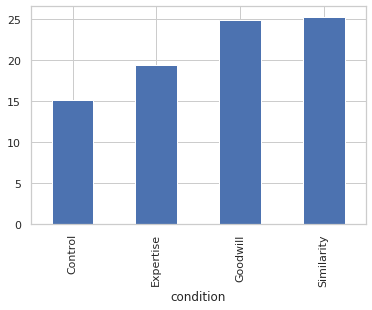

In [39]:
df.groupby("condition")["repetitions"].mean().plot.bar()

The Seaborn package (aliased here to `sns`) makes it easy to plot more complex graph. We overlay here a strip plot on top of a box plot, showing both the data distribution along with the summary stats:


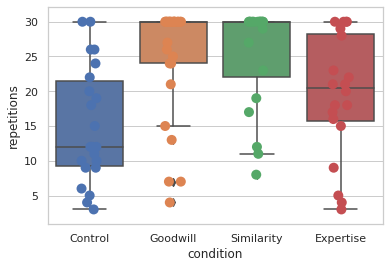

In [41]:
sns.boxplot(data=df,x="condition", y="repetitions")
sns.stripplot(data=df,x="condition", y="repetitions",size=10)

Here, we overlay the data distribution for all our participants, across the 4 conditions:

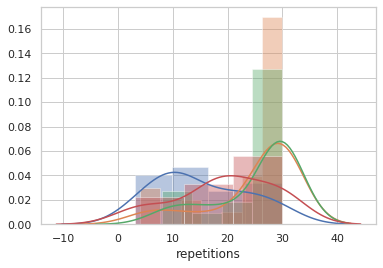

In [42]:
sns.distplot(df[df.condition=="Control"]["repetitions"])
sns.distplot(df[df.condition=="Goodwill"]["repetitions"])
sns.distplot(df[df.condition=="Similarity"]["repetitions"])
sns.distplot(df[df.condition=="Expertise"]["repetitions"])

## Statistical analysis

A couple of example of statistical analysis, first running t-tests. We can see that there is no significant different between the *Expertise* group and the *Control* group:

In [47]:
ttest_ind(df[df.condition=="Control"].repetitions, df[df.condition=="Expertise"].repetitions)

Ttest_indResult(statistic=-1.616083168428035, pvalue=0.11393732292717891)

In [48]:
ttest_ind(df[df.condition=="Control"].repetitions, df[df.condition=="Goodwill"].repetitions)

Ttest_indResult(statistic=-4.106192192069859, pvalue=0.00015923825697069873)

In [49]:
ttest_ind(df[df.condition=="Control"].repetitions, df[df.condition=="Similarity"].repetitions)

Ttest_indResult(statistic=-4.1130444932836925, pvalue=0.00018887852190108234)

### Correlations

Is there a correlation between #repetitions and exercice time?

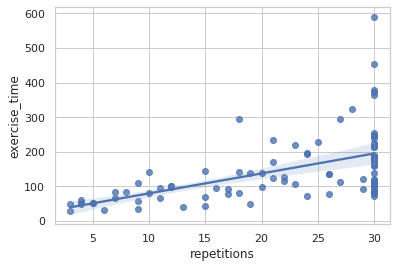

In [50]:
sns.regplot(df.repetitions, df.exercise_time)


In [56]:
pearsonr(df.repetitions, df.exercise_time)

(0.5368277680289255, 5.858200209382025e-08)

...and between the number of repetitions and the level of extroversion?

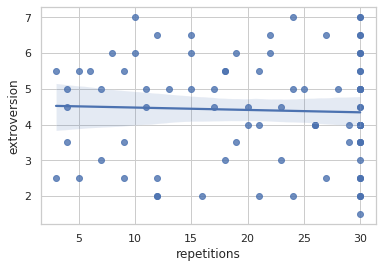

In [53]:
sns.regplot(df.repetitions, df.extroversion)

In [55]:
pearsonr(df.repetitions, df.extroversion)

(-0.04160155051183222, 0.6986912495876373)